[![View on GitHub](https://img.shields.io/badge/GitHub-View_on_GitHub-blue?logo=GitHub)](https://github.com/khuyentran1401/Data-science/blob/master/nlp/diffbot_examples/process_data.ipynb)

[<img src="https://deepnote.com/buttons/launch-in-deepnote.svg">](https://deepnote.com/project/Data-science-hxlyJpi-QrKFJziQgoMSmQ/%2FData-science%2Fnlp%2Fdiffbot_examples%2Fprocess_data.ipynb)

In [21]:
!pip install texthero

# Import data

In [5]:
import pandas as pd

In [8]:
data_scientist = pd.read_csv("/datasets/dataset/data-science-job-search.csv")
data_engineer = pd.read_csv("/datasets/dataset/data-engineer-job-search.csv")

In [9]:
data_scientist["title"] = ["data scientist"] * len(data_scientist)
data_engineer["title"] = ["data engineer"] * len(data_scientist)

In [10]:
df = pd.concat([data_scientist, data_engineer]).reset_index(drop=True)

Filter out the jobs without text

In [11]:
df = df[~df.text.isna()]

# Analyze Page Source

In [12]:
from yarl import URL

In [13]:
def get_page_source(url: str):
    return URL(url).host

In [14]:
df["page_host"] = df["pageUrl"].apply(get_page_source)

In [15]:
top_pages = df["page_host"].value_counts()[:20].to_frame()

In [16]:
import plotly.express as px

fig = px.histogram(
    top_pages,
    x=top_pages.index,
    y="page_host",
    labels={"sum of page_host": "frequency", "index": "page host"},
).update_xaxes(
    categoryorder="total descending",
)
fig

In [17]:
df.to_pickle("processed_df.pkl")

# Get Text

In [22]:
import texthero as hero

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047105 sha256=4f94e008252ee5c5358c0aeee0e18c314084c2a8d3db63f7fb461095657abc88
  Stored in directory: /root/.cache/pip/wheels/b7/0d/f0/7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [23]:
df["text"] = df["text"].pipe(hero.clean)
df["requirements"] = df["requirements"].pipe(hero.clean)
df["tasks"] = df["tasks"].pipe(hero.clean)

In [24]:
text = " ".join(df["text"].values)

In [25]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

%matplotlib inline


def make_wordcloud(new_text):
    """'function to make wordcloud"""

    wordcloud = WordCloud(
        width=800,
        height=800,
        min_font_size=10,
        background_color="black",
        colormap="Set2",
        collocation_threshold=3,
    ).generate(new_text)

    fig = plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.tight_layout(pad=0)

    plt.show()

    return fig

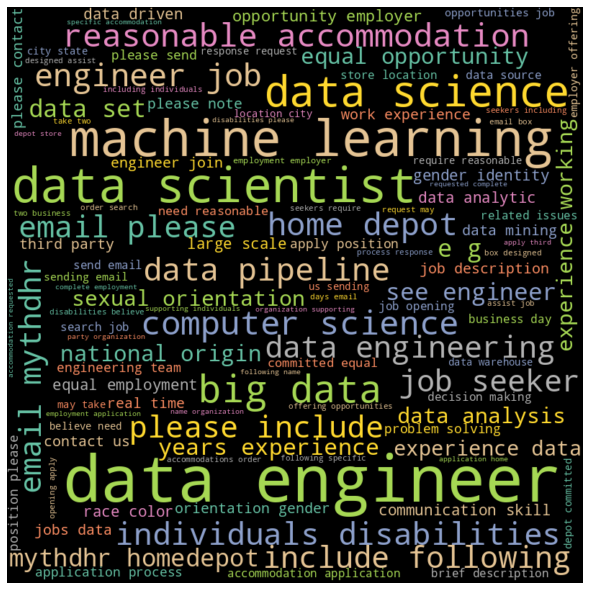

In [26]:
text_cloud = make_wordcloud(text)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87197226-98be-42b2-8527-389082831299' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>